In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [25]:
df = pd.read_csv('wa_fn-usec_-telco-customer-churn-9885c2ea-5e03-41a3-8198-0670a1109729-ceeff6fe-e4f2-4285-a5b6-1e7941d1f9d2 (1).csv')

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
labels = ['churn', 'is not churn']
churn = sum([1 if i == 'Yes' else 0 for i in df['Churn']])
not_churn = len(df['Churn'])-churn

([<matplotlib.patches.Wedge at 0x295c2ddd450>,
 [Text(0.7393679040381534, 0.8144538676181899, 'churn'),
  Text(-0.7393679802928249, -0.814453798393567, 'is not churn')],
 [Text(0.40329158402081094, 0.4442475641553763, '26.5%'),
  Text(-0.40329162561426807, -0.44424752639649107, '73.5%')])

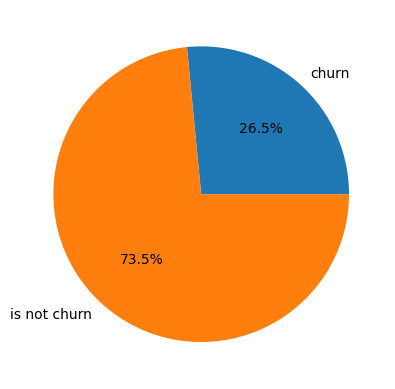

In [30]:
plt.pie([churn, not_churn], labels=labels, autopct='%1.1f%%')
# all users

In [31]:
# only old
old_churn = 0
old_not_churn = 0
index = 0
for i in df['Churn']:
    if i == 'Yes':
        if df['SeniorCitizen'][index]:
            old_churn+=1
    else:
        if df['SeniorCitizen'][index]:
            old_not_churn+=1
    index +=1
    

([<matplotlib.patches.Wedge at 0x295c2ebdc30>,
 [Text(0.28421379856096785, 1.0626488209693483, 'churn'),
  Text(-0.2842137985609678, -1.0626488209693483, 'is not churn')],
 [Text(0.15502570830598245, 0.5796266296196444, '41.7%'),
  Text(-0.15502570830598242, -0.5796266296196444, '58.3%')])

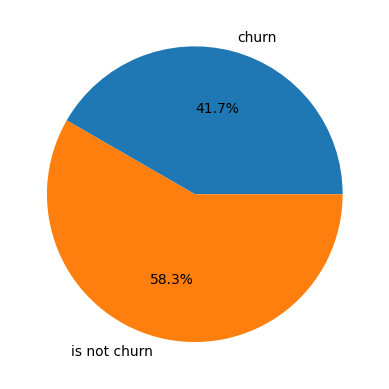

In [32]:
plt.pie([old_churn, old_not_churn], labels=labels, autopct='%1.1f%%')

In [33]:
set(df['InternetService'])

{'DSL', 'Fiber optic', 'No'}

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
str_to_int = lambda x: 1 if x=='Yes' else 0
service_list = ['OnlineSecurity', 'StreamingTV', 'StreamingMovies',
                'DeviceProtection', 'TechSupport']
for i in service_list:
    df[i]=df[i].apply(str_to_int)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
# for i in service_list:
#     
index = 0
servies_nums = [0, 1, 2, 3, 4, 5]
servies_peoples = [0, 0, 0, 0, 0, 0]
for i in df['InternetService']:
    if i != 'No' and df['Churn'][index] == 'Yes':
        s = 0
        for j in service_list:
            s+= df[j][index]
        servies_peoples[s] += 1 
    index += 1

Text(0, 0.5, 'peoples num')

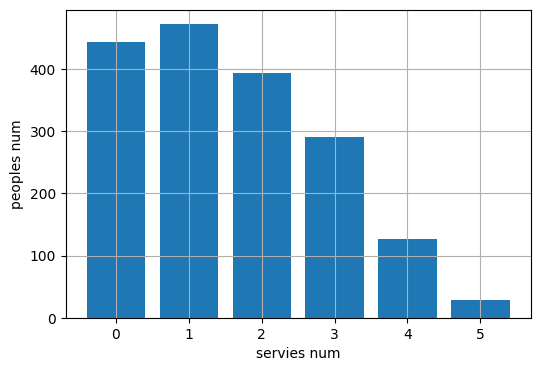

In [39]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
ax.bar(servies_nums, servies_peoples)
ax.grid()
ax.set_xlabel('servies num')
ax.set_ylabel('peoples num')

In [40]:
not_old_churn = 0
not_old_not_churn = 0
index = 0
for i in df['Churn']:
    if i == 'Yes':
        if not df['SeniorCitizen'][index]:
            not_old_churn+=1
    else:
        if not df['SeniorCitizen'][index]:
            not_old_not_churn+=1
    index +=1

([<matplotlib.patches.Wedge at 0x295c47169b0>,
 [Text(0.8111204723673471, 0.7430232696938716, 'churn'),
  Text(-0.8111205071507758, -0.7430232317225811, 'is not churn')],
 [Text(0.44242934856400745, 0.40528541983302085, '23.6%'),
  Text(-0.44242936753678674, -0.4052853991214078, '76.4%')])

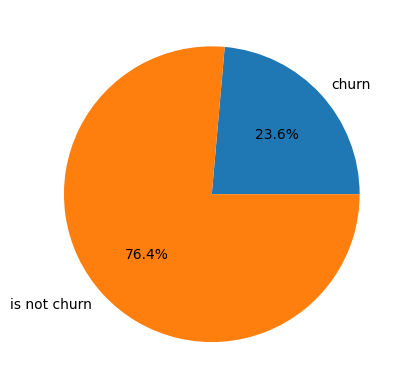

In [41]:
plt.pie([not_old_churn, not_old_not_churn], labels=labels, autopct='%1.1f%%')

[0, 1, 2, 3, 4, 5]
[299, 329, 307, 239, 100, 23]
100


([<matplotlib.patches.Wedge at 0x295c4be0eb0>,
 [Text(0.823905251000175, 0.7288210599141184, '0'),
  Text(-0.6870284230579569, 0.8590645761003635, '1'),
  Text(-0.8794691908941554, -0.6607071531836021, '2'),
  Text(0.42433400941167276, -1.0148599156812799, '3'),
  Text(1.0319297018652234, -0.3809476216074215, '4'),
  Text(1.0982934145153884, -0.06125010720096191, '5')],
 [Text(0.44940286418191355, 0.3975387599531554, '23.1%'),
  Text(-0.37474277621343094, 0.46858067787292546, '25.4%'),
  Text(-0.47971046776044834, -0.3603857199183284, '23.7%'),
  Text(0.23145491422454872, -0.5535599540079708, '18.4%'),
  Text(0.56287074647194, -0.20778961178586625, '7.7%'),
  Text(0.5990691351902119, -0.03340914938234286, '1.8%')])

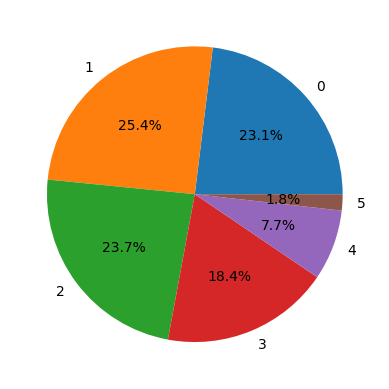

In [46]:
index = 0
servies_nums = [0, 1, 2, 3, 4, 5]
servies_peoples = [0, 0, 0, 0, 0, 0]
for i in df['InternetService']:
    if i == 'Fiber optic' and df['Churn'][index] == 'Yes':
        s = 0
        for j in service_list:
            s+= df[j][index]
        servies_peoples[s] += 1 
    index += 1
    
print(servies_nums)
print(servies_peoples)
fiber_4 = servies_peoples[4]
print(fiber_4)

plt.pie(servies_peoples, labels=servies_nums, autopct='%1.1f%%')

[0, 1, 2, 3, 4, 5]
[145, 143, 87, 52, 26, 6]
26


([<matplotlib.patches.Wedge at 0x295c57d8d30>,
 [Text(0.601311199337794, 0.9210997999950624, '0'),
  Text(-1.0826284947008993, 0.19471913737911115, '1'),
  Text(-0.19101303487659768, -1.0832885213585677, '2'),
  Text(0.7711344046311703, -0.7844435798667299, '3'),
  Text(1.0630039959680542, -0.28288249248751524, '4'),
  Text(1.0990725737054268, -0.045160577150093605, '5')],
 [Text(0.32798792691152395, 0.5024180727245794, '31.6%'),
  Text(-0.5905246334732177, 0.10621043857042425, '31.2%'),
  Text(-0.10418892811450782, -0.5908846480137642, '19.0%'),
  Text(0.42061876616245647, -0.42787831629094353, '11.3%'),
  Text(0.5798203614371205, -0.15429954135682647, '5.7%'),
  Text(0.5994941311120509, -0.024633042081869234, '1.3%')])

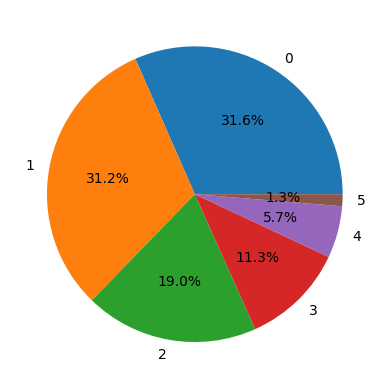

In [47]:
index = 0
servies_nums = [0, 1, 2, 3, 4, 5]
servies_peoples = [0, 0, 0, 0, 0, 0]
for i in df['InternetService']:
    if i == 'DSL' and df['Churn'][index] == 'Yes':
        s = 0
        for j in service_list:
            s+= df[j][index]
        servies_peoples[s] += 1 
    index += 1
    
print(servies_nums)
print(servies_peoples)
dsl_4 = servies_peoples[4]
print(dsl_4)

plt.pie(servies_peoples, labels=servies_nums, autopct='%1.1f%%')

In [45]:
100-26

74